**Homework 5 main file**

**Necessary Imports**

In [13]:
import pandas as pd 
import numpy as np
import ijson
import networkx as nx
import os
from tqdm import tqdm
from itertools import combinations
import ast
import matplotlib.pyplot as plt
import random
import seaborn as sns


**PART 1**

Paths

In [2]:
papers_path = r"C:\Users\Elias Antoun\Desktop\Data Science Sapienza\Semester 1\ADM\Assignments\Antoun_ADM_HW5\dblp.v12.json"

Steps taken to load the massive dataset

In [3]:
# Function to return a dataframe out of every chunk of data
def process_chunk(chunk):
    return pd.DataFrame(chunk)

# After (a lot of) trial and error, chunk size = 1000 was the best option
def chunk_generator(file_path, chunk_size=1000):
    """Generator function that yields chunks of data."""
    with open(file_path, 'rb') as file:
        objects = ijson.items(file, 'item')
        chunk = []
        for obj in objects:
            chunk.append(obj)
            if len(chunk) >= chunk_size:
                yield chunk
                chunk = []
        if chunk:
            yield chunk

# Process the file from the specified path in chunks, and save intermediate results to recover progress in case of crash
def process_file(file_path, chunk_size=1000, save_interval=10):
    chunks = chunk_generator(file_path, chunk_size)
    pbar = tqdm(desc="Processing chunks", unit="chunk")

    # empty df to store data
    processed_data = pd.DataFrame()

    for i, chunk in enumerate(chunks):
        df_chunk = process_chunk(chunk)
        processed_data = pd.concat([processed_data, df_chunk], ignore_index=True)
        pbar.update(1)

        # Save intermediate results every 10 chunks
        if (i + 1) % save_interval == 0:
            processed_data.to_csv(f'intermediate_result_{i + 1}.csv', index=False)
            processed_data = pd.DataFrame()  # Reset to free up memory

    pbar.close()
    return processed_data

final_data = process_file(papers_path)


Processing chunks: 4895chunk [20:04,  4.06chunk/s]


Join all the intermediate csv files together to generate a new complete dataframe, and save it as csv for easier access.

In [4]:
intermediate_files = [f for f in os.listdir() if f.startswith('intermediate_result_')]

papers_df = pd.concat([pd.read_csv(f) for f in intermediate_files], ignore_index=True)

# Save the combined data to a new file 
papers_df.to_csv('final_combined_data.csv', index=False)


_In case of kernel restart, run imports block and below this line only_

In [2]:
papers_df = pd.read_csv('final_combined_data.csv')

C:\Users\Elias Antoun\AppData\Local\Temp\ipykernel_21196\3251129193.py:1: DtypeWarning: Columns (5,6,16) have mixed types. Specify dtype option on import or set low_memory=False.
  papers_df = pd.read_csv('final_combined_data.csv')


In [3]:
papers_df.head(10)

,id,authors,title,year,n_citation,page_start,page_end,doc_type,publisher,volume,issue,doi,references,indexed_abstract,fos,venue,alias_ids
0,1091,"[{'name': 'Makoto Satoh', 'org': 'Shinshu Univ...",Preliminary Design of a Network Protocol Learn...,2013,1,89.0,93.0,Conference,"Springer, Berlin, Heidelberg",NaN,NaN,10.1007/978-3-642-39476-8_19,"[2005687710, 2018037215]","{'IndexLength': 58, 'InvertedIndex': {'tool.':...","[{'name': 'Telecommunications network', 'w': D...",{'raw': 'International Conference on Human-Com...,NaN
1,1388,"[{'name': 'Pranava K. Jha', 'id': 2718958994}]",Further Results on Independence in Direct-Prod...,2000,1,NaN,NaN,Journal,NaN,56.0,NaN,NaN,NaN,NaN,"[{'name': 'Graph', 'w': Decimal('0.0')}, {'nam...","{'raw': 'Ars Combinatoria', 'id': 73158690, 't...",NaN
2,1674,"[{'name': 'G. Beale', 'org': 'Archaeological C...",A methodology for the physically accurate visu...,2011,1,137.0,144.0,Conference,Eurographics Association,NaN,NaN,10.2312/VAST/VAST11/137-144,"[1535888970, 1992876689, 1993710814, 203565334...","{'IndexLength': 201, 'InvertedIndex': {'illust...","[{'name': 'Statue', 'w': Decimal('0.40216')}, ...",{'raw': 'International Conference on Virtual R...,NaN
3,1688,"[{'name': 'Altaf Hossain', 'org': 'Department ...","Comparison of GARCH, Neural Network and Suppor...",2009,6,597.0,602.0,Conference,"Springer, Berlin, Heidelberg",NaN,NaN,10.1007/978-3-642-11164-8_97,"[1560724230, 1986968751, 2156909104]","{'IndexLength': 64, 'InvertedIndex': {'standar...",[{'name': 'Autoregressive–moving-average model...,{'raw': 'Pattern Recognition and Machine Intel...,NaN
4,5411,"[{'name': 'Rafael Álvarez', 'id': 2125293936},...",COMPARING GNG3D AND QUADRIC ERROR METRICS METH...,2009,0,99.0,102.0,Conference,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Computer vision', 'w': Decimal('0.4...",{'raw': 'International Conference on Computer ...,NaN
5,5781,"[{'name': 'Jovan Dj. Golic', 'id': 1237859792}...",Vectorial fast correlation attacks.,2004,2,247.0,NaN,Repository,NaN,2004.0,NaN,NaN,NaN,NaN,"[{'name': 'Pattern recognition', 'w': Decimal(...","{'raw': 'IACR Cryptology ePrint Archive', 'id'...",NaN
6,6522,"[{'name': 'Güzin Ulutas', 'org': 'Karadeniz Te...",Improved Secret Image Sharing Method By Encodi...,2011,0,331.0,335.0,Conference,"Springer, London",NaN,NaN,10.1007/978-1-4471-2155-8_42,"[2007942710, 2040446335, 2042901705, 2138296484]","{'IndexLength': 89, 'InvertedIndex': {'44': [7...","[{'name': 'Peak signal-to-noise ratio', 'w': D...",{'raw': 'International Symposium on Computer a...,NaN
7,6762,"[{'name': 'Pranay Chaudhuri', 'id': 2142249029...",A Self-Stabilizing Algorithm for Finding the C...,2003,0,1460.0,1463.0,Conference,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Computer science', 'w': Decimal('0....",{'raw': 'Parallel and Distributed Processing T...,NaN
8,8373,"[{'name': 'Phan Cong Vinh', 'org': 'Department...",Formal agent-oriented ubiquitous computing: a ...,2012,0,498.0,508.0,Conference,"Springer, Berlin, Heidelberg",NaN,NaN,10.1007/978-3-642-28490-8_52,"[141500162, 1977736041, 2057072261, 2495388083...","{'IndexLength': 83, 'InvertedIndex': {'before'...","[{'name': 'Ubiquitous commerce', 'w': Decimal(...",{'raw': 'Asian Conference on Intelligent Infor...,NaN
9,8763,"[{'name': 'Dominik Szajerman', 'org': 'Lodz Un...",Fur Visualisation for Computer Game Engines an...,2014,0,41.0,48.0,Conference,"Springer, Cham",NaN,NaN,10.1007/978-3-319-11331-9_6,"[2002239941, 2062162286, 2114709034]","{'IndexLength': 84, 'InvertedIndex': {'fur': [...","[{'name': 'Computer graphics (images)', 'w': D...",{'raw': 'International Conference on Computer ...,NaN


In [4]:
# Preprocess and sort papers by citation count using numpy
top_papers = papers_df.nlargest(10000, 'n_citation')
top_papers.head(10)

,id,authors,title,year,n_citation,page_start,page_end,doc_type,publisher,volume,issue,doi,references,indexed_abstract,fos,venue,alias_ids
4126136,2041404167,"[{'name': 'C. E. Shannon', 'org': 'External Or...",The Mathematical Theory of Communication,1949,48327,NaN,NaN,Book,NaN,NaN,NaN,NaN,NaN,"{'IndexLength': 89, 'InvertedIndex': {'through...","[{'name': 'Applied mathematics', 'w': Decimal(...",NaN,NaN
4050907,1639032689,"[{'name': 'David E. Goldberg', 'id': 2102678951}]","Genetic algorithms in search, optimization, an...",1989,44175,NaN,NaN,Book,NaN,NaN,NaN,NaN,NaN,"{'IndexLength': 75, 'InvertedIndex': {'researc...","[{'name': 'Genetic operator', 'w': Decimal('0....",NaN,NaN
3462588,2912565176,"[{'name': 'Lotfi A. Zadeh', 'id': 2252586558}]",Fuzzy sets,1996,42437,394.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Data mining', 'w': Decimal('0.36889...","{'raw': 'Fuzzy sets, fuzzy logic, and fuzzy sy...",NaN
2167610,2151103935,"[{'name': 'David G. Lowe', 'org': 'Computer Sc...",Distinctive Image Features from Scale-Invarian...,2004,35541,91,110,Journal,Kluwer Academic Publishers,60.0,2.0,10.1023/B:VISI.0000029664.99615.94,"[19720318, 1541642243, 1560959218, 1676552347,...","{'IndexLength': 164, 'InvertedIndex': {'distor...","[{'name': 'Scale-invariant feature transform',...",{'raw': 'International Journal of Computer Vis...,"[2184229386, 2997701940]"
3448311,2911964244,"[{'name': 'Leo Breiman', 'org': 'Statistics De...",Random Forests,2001,34741,5,32,NaN,NaN,45.0,1.0,10.1023/A:1010933404324,"[1507255258, 1580948147, 1605688901, 197584664...","{'IndexLength': 160, 'InvertedIndex': {'but': ...","[{'name': 'AdaBoost', 'w': Decimal('0.55878')}...",{'raw': 'Machine Learning archive'},NaN
171333,1973948212,"[{'name': 'David W. Hosmer', 'org': '‡Universi...",Applied Logistic Regression,1989,32053,NaN,NaN,Book,NaN,NaN,NaN,NaN,NaN,"{'IndexLength': 47, 'InvertedIndex': {'for': [...","[{'name': 'Binomial regression', 'w': Decimal(...",{'raw': ''},"[2017629773, 2569957239, 2795977808, 279730213..."
1901785,2153635508,"[{'name': 'Chih-Chung Chang', 'org': 'National...",LIBSVM: A library for support vector machines,2011,31047,27.0,NaN,Journal,ACM,2.0,3.0,10.1145/1961189.1961199,"[1510526001, 1543810117, 1556115774, 156879334...","{'IndexLength': 75, 'InvertedIndex': {'been': ...","[{'name': 'Graph kernel', 'w': Decimal('0.4826...",{'raw': 'ACM Transactions on Intelligent Syste...,NaN
1939388,2156909104,"[{'name': 'Vladimir N. Vapnik', 'org': 'AT&T B...",The Nature of Statistical Learning Theory,1995,28886,NaN,NaN,Book,NaN,NaN,NaN,NaN,NaN,"{'IndexLength': 34, 'InvertedIndex': {'algorit...","[{'name': 'Statistical learning theory', 'w': ...",{'raw': ''},NaN
4558041,1791587663,"[{'name': 'Fred D. Davis', 'org': 'Computer an...","Perceived usefulness, perceived ease of use, a...",1989,25855,319.0,340.0,Journal,Society for Information Management and The Man...,13.0,3.0,10.2307/249008,"[157213131, 1520103841, 1778357938, 1972888601...","{'IndexLength': 229, 'InvertedIndex': {'practi...","[{'name': 'Expectation confirmation theory', '...",{'raw': 'Management Information Systems Quarte...,NaN
1483078,2119821739,"[{'name': 'Corinna Cortes', 'org': 'AT&T Bell ...",Support-Vector Networks,1995,22276,273.0,297.0,Journal,Kluwer Academic Publishers,20.0,3.0,10.1023/A:1022627411411,"[2087347434, 2154579312, 2168228682]","{'IndexLength': 122, 'InvertedIndex': {'very':...","[{'name': 'Online machine learning', 'w': Deci...","{'raw': 'Machine Learning', 'id': 62148650, 't...",NaN


Some explorative visualizations

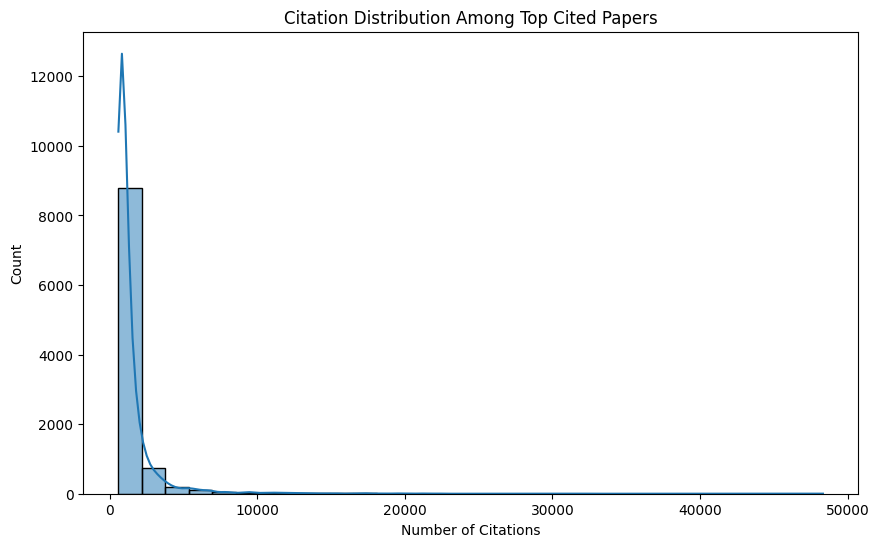

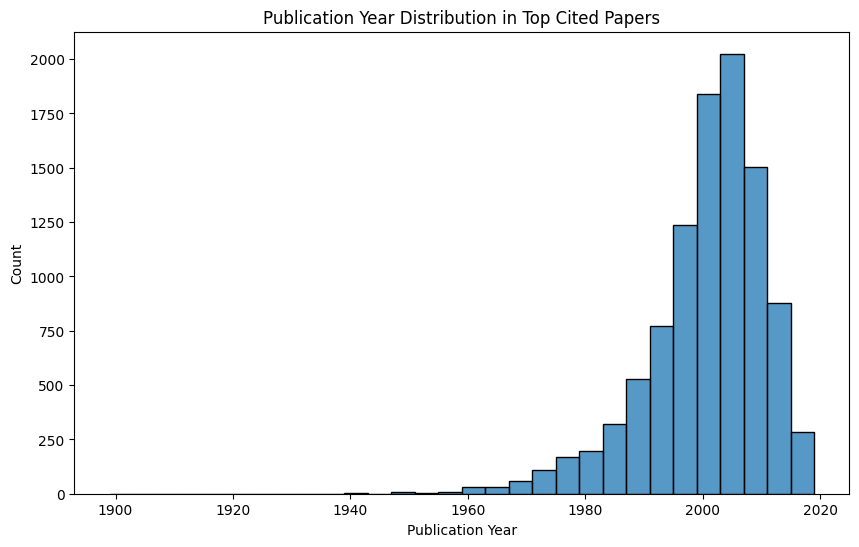

In [16]:
topics = []
for _, row in top_papers.iterrows():
    fos_str = row['fos']
    try:
        fos_list = ast.literal_eval(fos_str) if isinstance(fos_str, str) else fos_str
        topics.extend([fos['name'] for fos in fos_list if isinstance(fos, dict)])
    except:
        continue

# Example: Citation Distribution in Top Papers
plt.figure(figsize=(10, 6))
sns.histplot(top_papers['n_citation'], bins=30, kde=True)
plt.title('Citation Distribution Among Top Cited Papers')
plt.xlabel('Number of Citations')
plt.ylabel('Count')
plt.show()

# Example: Publication Year Distribution in Top Papers
plt.figure(figsize=(10, 6))
sns.histplot(top_papers['year'], bins=30, kde=False)
plt.title('Publication Year Distribution in Top Cited Papers')
plt.xlabel('Publication Year')
plt.ylabel('Count')
plt.show()



In [5]:
# Citation Graph
citation_graph = nx.DiGraph()
for _, row in top_papers.iterrows():
    paper_id = row['id']
    references_str = row['references']
    
    # Safely evaluate the string as a list
    try:
        references = ast.literal_eval(references_str) if isinstance(references_str, str) else references_str
    except ValueError:
        # Skip if the conversion fails
        continue
    
    if isinstance(references, list):
        for ref in references:
            if ref in top_papers['id'].values:
                citation_graph.add_edge(paper_id, ref)


In [6]:
citation_graph

In [7]:
# Collaboration graph
collaboration_graph = nx.Graph()
for _, row in top_papers.iterrows():
    authors_str = row['authors']
    try:
        authors = ast.literal_eval(authors_str)
        # Extract a unique identifier for each author (e.g., name or ID)
        author_ids = [author.get('id') or author.get('name') for author in authors]
    except ValueError:
        author_ids = []
    
    for author_pair in combinations(author_ids, 2):
        if collaboration_graph.has_edge(*author_pair):
            collaboration_graph[author_pair[0]][author_pair[1]]['weight'] += 1
        else:
            collaboration_graph.add_edge(author_pair[0], author_pair[1], weight=1)


In [8]:
collaboration_graph

Example Graph from random subset

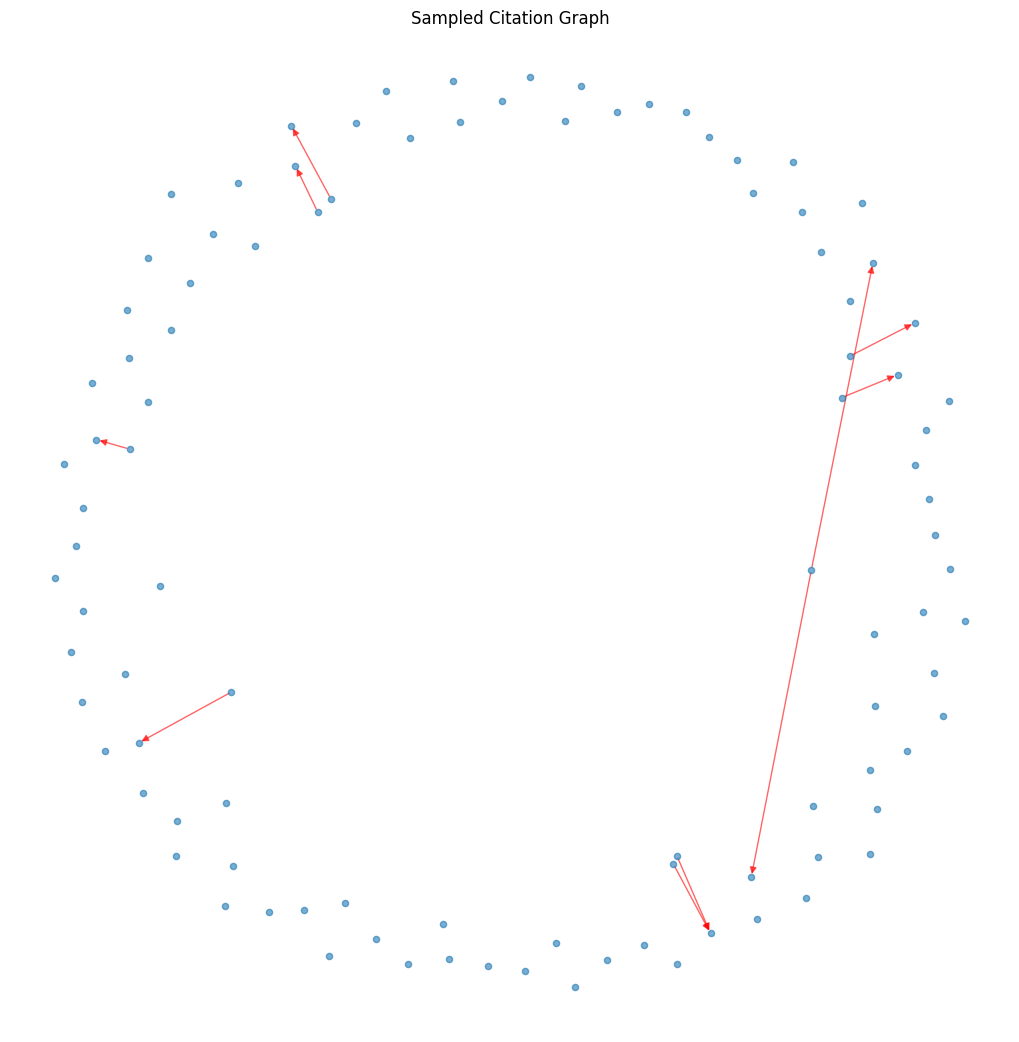

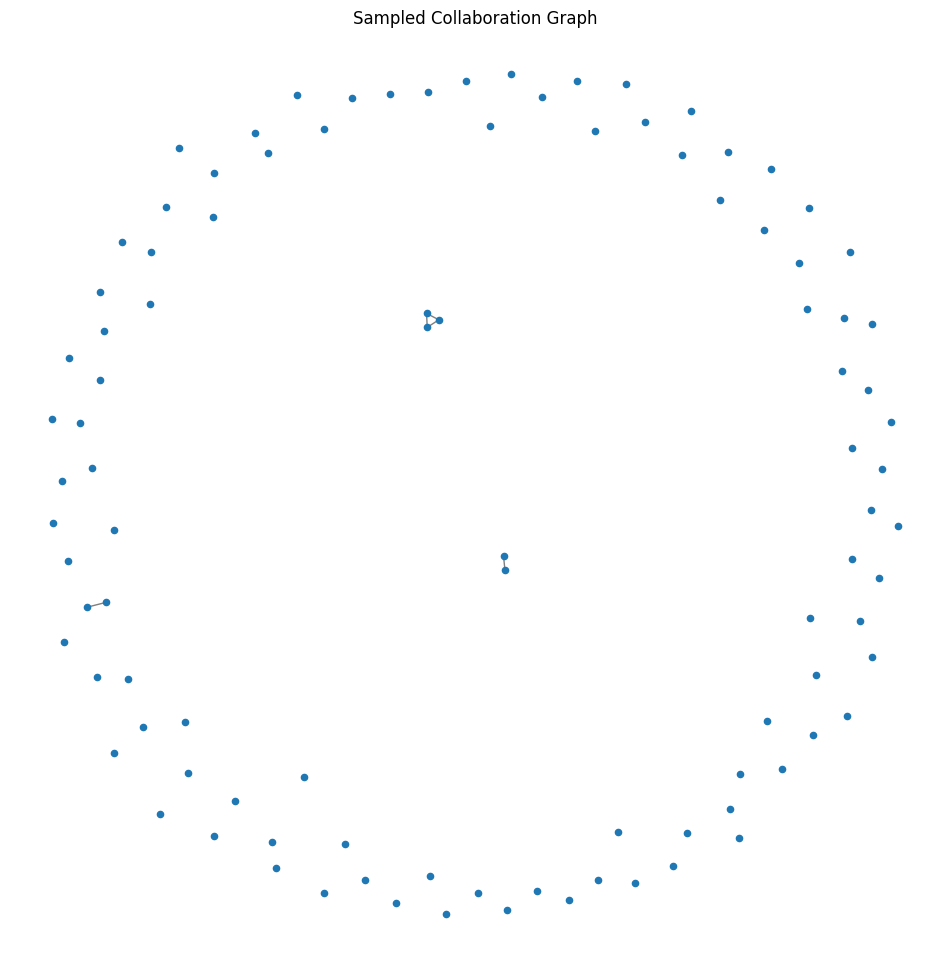

In [18]:
# Citation graph sample
sampled_nodes = random.sample(list(citation_graph.nodes()), 100)
subgraph = citation_graph.subgraph(sampled_nodes)

# Visualize the subgraph
plt.figure(figsize=(10, 10))
nx.draw(subgraph, with_labels=False, node_size=20, alpha=0.6, edge_color='r')
plt.title('Sampled Citation Graph')
plt.show()


# Collaboration graph sample
sampled_nodes = random.sample(list(collaboration_graph.nodes()), 100)
subgraph = collaboration_graph.subgraph(sampled_nodes)

# Visualize the subgraph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(subgraph)  # Positions for all nodes
nx.draw_networkx_nodes(subgraph, pos, node_size=20)
nx.draw_networkx_edges(subgraph, pos, alpha=0.5)
plt.title('Sampled Collaboration Graph')
plt.axis('off')  # Turn off the axis
plt.show()
